In [1]:
using PyPlot
using Interact
using LaTeXStrings

# Llamando a archivos

In [2]:
function Abrir_archivos_con_observables(carpeta="Resultados-h-fija/",archivo="Susceptibilidad-magnetica_WL2D_red-cuadrada_Ising-ferro_cam-10_f-0.0001_h-0.0_T-[1.7-2.7-51].txt",campo=0)
    ruta = carpeta*archivo
    datos=readdlm(ruta);
    global h=campo
    global L=collect(datos[1,2:end])
    global Temperatura=datos[2:end,1]
    global susceptibilidad_magnética=datos[2:end,2:end]
end

Abrir_archivos_con_observables (generic function with 4 methods)

# Grafica de observables

In [3]:
function Grafica_observable_para_distintos_L(observable_macroscópica, eje_y, observable, conjunto_de_tamaños; v="auto")
    índice = [findfirst(L,valores) for valores in conjunto_de_tamaños]
    for j in índice
        if v !="auto"
            xlim(v)
        end
        plot(Temperatura,observable_macroscópica[:,j], label = latexstring("L=$(L[j])"))
    end
        #legend (loc="upper right")
    xlabel(L"T")
    ylabel(eje_y)
    title(observable*" \n para varios tamaños de sistema")
    legend()
end

Grafica_observable_para_distintos_L (generic function with 1 method)

In [113]:
function Graficar_variando_coeficientes_críticos(observable_macroscópica, eje_y, observable, conjunto_de_tamaños)    
    índice = Int[findfirst(L,valores) for valores in conjunto_de_tamaños]
    fig = figure()
    @manipulate for T_c=linspace(2,3,21), γ=linspace(1.3,2.3,21), ν=linspace(0.5,1.5,21)
        temperatura_reducida = (Temperatura-T_c)/T_c 
        withfig(fig) do
            for j in índice
                xlabel(L"(T-T_c)L^{(1/\nu)}")
                ylabel(eje_y)
                legend()
                title(observable*" \n para varios tamaños de sistema")
                plot(temperatura_reducida*L[j]^(1/ν), (susceptibilidad_magnética[:,j])/(L[j])^(γ/ν),".")
            end
        end
    end
end

Graficar_variando_coeficientes_críticos (generic function with 1 method)

# Ajustar pseudo-puntos críticos a una recta para encontrar Tc

In [81]:
function Encontrar_puntos_pseudocríticos(ys,conjunto_de_índices)
    y = zeros(length(conjunto_de_índices))
    for i in 1:length(conjunto_de_índices)
        y[i]=Temperatura[indmax(ys[:,i])]
    end
    return y
end

Encontrar_puntos_pseudocríticos (generic function with 3 methods)

In [82]:
function Ajuste_lineal_con_estadística(x,y)
    regresión = zeros(2)
    regresión[1],regresión[2]= linreg(x,y)
    N = length(x)
    χ_cuadrada = dot((y-regresión[1]-regresión[2]*x),(y-regresión[1]-regresión[2]*x))
    S_x = sum(x)
    S_y = sum(y)
    S_xx = dot(x,x)
    S_yy = dot(y,y)
    S_xy = dot(x,y)
    σ_y_cuadrada = χ_cuadrada/(N-2)
    push!(regresión,sqrt(σ_y_cuadrada))
    ϵ_a = sqrt((N/(N*S_xx-S_x*S_x))*σ_y_cuadrada)
    ϵ_b = sqrt((S_xx/(N*S_xx-S_x*S_x))*σ_y_cuadrada)
    R_cuadrada =  (N*S_xy-S_x*S_y)^2 / ((N*S_xx-S_x*S_x)*(N*S_yy-S_y*S_y))
    push!(regresión, R_cuadrada)
    push!(regresión,ϵ_a)
    push!(regresión,ϵ_b)
    return regresión
end

Ajuste_lineal_con_estadística (generic function with 1 method)

## Graficar ajuste lineal

In [96]:
function Ajustar_pseudo_críticos(observable_macroscópica, eje_y, observable, conjunto_de_tamaños)
    índice = Int[findfirst(L,valores) for valores in conjunto_de_tamaños]
    y=Encontrar_puntos_pseudocríticos(observable_macroscópica,índice)
    fig = figure()
    @manipulate for ν in 0.5:.1:1.5
        withfig(fig) do
            x = conjunto_de_tamaños.^(-1/ν)
            ajuste =  Ajuste_lineal_con_estadística(x,y)
            #println(ajuste)
            plot(x,y,"o",label=L"\nu="*latexstring("$ν"))
            plot(x, (ajuste[1])+x*(ajuste[2]), label = latexstring("y=$(round(ajuste[1],3))+$(round(ajuste[2],3))x")*"\n"*latexstring("R^2=$(round(ajuste[4],3))"))
            xlabel(L"L^{(1/ν)}")
            ylabel(L"T")
            title("Ajuste lineal de pseudo-puntos críticos")
            legend()
        end
    end
end 

Ajustar_pseudo_críticos (generic function with 1 method)

# Trabajar

Interact.Slider{Float64}(Signal{Float64}(1.0, nactions=0),"ν",1.0,0.5:0.1:1.5,true)

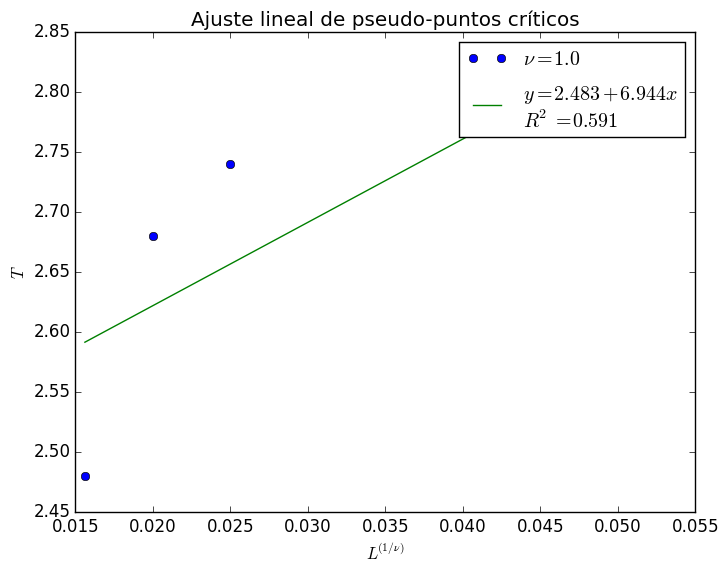

In [105]:
Ajustar_pseudo_críticos(susceptibilidad_magnética,L"\chi","Susceptibilidad magnética",[20,40,50,64])

In [5]:
Abrir_archivos_con_observables();

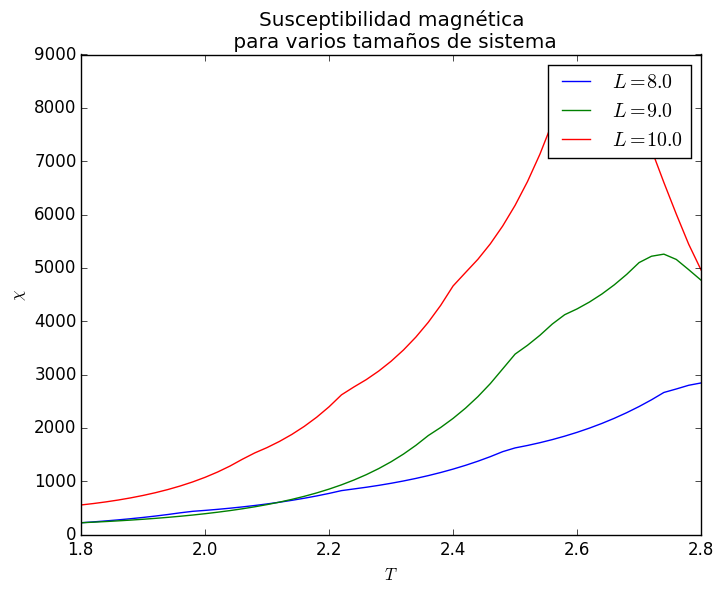

PyObject <matplotlib.legend.Legend object at 0x31fa636d8>

In [116]:
Grafica_observable_para_distintos_L(susceptibilidad_magnética,L"\chi","Susceptibilidad magnética",[8,9,10])

Interact.Slider{Float64}(Signal{Float64}(2.5, nactions=0),"T_c",2.5,linspace(2.0,3.0,21),true)

Interact.Slider{Float64}(Signal{Float64}(1.8, nactions=0),"γ",1.8,linspace(1.3,2.3,21),true)

Interact.Slider{Float64}(Signal{Float64}(1.0, nactions=0),"ν",1.0,linspace(0.5,1.5,21),true)

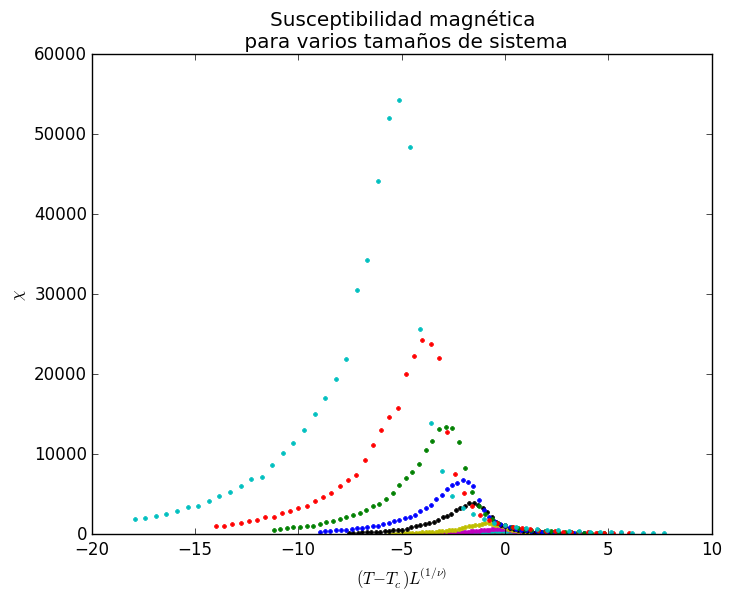

In [114]:
Graficar_variando_coeficientes_críticos(susceptibilidad_magnética,L"\chi","Susceptibilidad magnética",L)